# 简单的例子

<span style="float: left">Prev: <a href="./index.html">乘车指南 🚇</a></span>
<span style="float: right">Next: <a href="./jike_api.html">即刻Web API</a></span>

In [1]:
import jike
c = jike.JikeClient()

## 获取瓦总和不管姐粉丝性别百分比

想法来自 [劳斯判据](https://web.okjike.com/user/c7d257c7-a4fc-4383-a779-49f3123adfab/post) 的 [动态](https://web.okjike.com/post-detail/5ac0a1dee72e500017c5e47f/originalPost)

In [2]:
# 瓦总
ceo_follower = c.get_user_follower(username='82D23B32-CF36-4C59-AD6F-D05E3552CBF3')
ceo_follower

List(20 items)

In [3]:
ceo_follower.load_all()

19956

In [4]:
# 不管姐
boss_follower = c.get_user_follower(username='B5C00109-15EA-4351-8B93-E58651E8C39D')
boss_follower.load_all()

4388

In [5]:
ceo_male_fan_count = sum((follower.gender == 'MALE' for follower in ceo_follower))
ceo_female_fan_count = sum((follower.gender == 'FEMALE' for follower in ceo_follower))
ceo_other_fan_count = sum(follower.gender == None for follower in ceo_follower)
print(ceo_male_fan_count, ceo_female_fan_count, ceo_other_fan_count)

12794 4070 3092


In [6]:
boss_male_fan_count = sum((follower.gender == 'MALE' for follower in boss_follower))
boss_female_fan_count = sum((follower.gender == 'FEMALE' for follower in boss_follower))
boss_other_fan_count = sum(follower.gender == None for follower in boss_follower)
print(boss_male_fan_count, boss_female_fan_count, boss_other_fan_count)

2844 1163 381


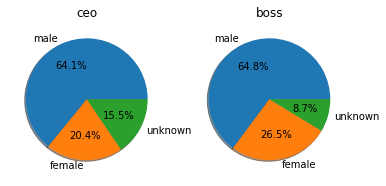

In [7]:
% matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

labels = 'male', 'female', 'unknown'
ceo_stats = (ceo_male_fan_count, ceo_female_fan_count, ceo_other_fan_count)
boss_stats = (boss_male_fan_count, boss_female_fan_count, boss_other_fan_count)

the_grid = GridSpec(1, 2)
plt.subplot(the_grid[0, 0], aspect=1)
plt.title('ceo')
plt.pie(ceo_stats, labels=labels, autopct='%1.1f%%', shadow=True)
plt.subplot(the_grid[0, 1], aspect=1)
plt.title('boss')
plt.pie(boss_stats, labels=labels, autopct='%1.1f%%', shadow=True)

## 店长发车的时间分布

基于最近一个月 [不好笑便利店](https://web.okjike.com/topic/5701d10d5002b912000e588d/official) 主题下的精选，由评论判断是否开车

In [8]:
# 不好笑便利店 的主题精选
selected = c.get_topic_selected(topic_id='5701d10d5002b912000e588d')

In [9]:
from datetime import datetime, timedelta
today = datetime.today()
a_month_ago = today - timedelta(days=30)
date_parse = lambda t: datetime.strptime(t[:-5], '%Y-%m-%dT%H:%M:%S')

In [10]:
comment_keywords = {'奶', '任务', '爱尔兰', '不动产', '发车', '开车', '上车', '窑子', '黄色', '黄即', 
                    '片子', '看片', '借一部', '资源', '举报'}

In [11]:
from collections import defaultdict
time_periods = defaultdict(int)

In [12]:
message_date = today
while message_date > a_month_ago:
    messages = selected.load_more(limit=100)
    for message in messages:
        message_date = date_parse(message.createdAt)
        comments = c.get_comment(message)
        comments.load_full()
        for comment in comments:
            if any((keyword in comment.content for keyword in comment_keywords)):
                time_periods[message_date.hour] += 1

In [13]:
# UTC time, should +8 for Asia/Shanghai
adjusted_time_periods = [((h+8)%24, time_periods[h]) for h in range(24)]

In [14]:
adjusted_time_periods = adjusted_time_periods[-8:] + adjusted_time_periods[:-8]
adjusted_time_periods

[(0, 0),
 (1, 0),
 (2, 0),
 (3, 0),
 (4, 0),
 (5, 0),
 (6, 0),
 (7, 0),
 (8, 13),
 (9, 20),
 (10, 8),
 (11, 20),
 (12, 33),
 (13, 30),
 (14, 42),
 (15, 71),
 (16, 17),
 (17, 37),
 (18, 41),
 (19, 31),
 (20, 41),
 (21, 38),
 (22, 18),
 (23, 2)]

店长最可能发车的三个时间段

In [15]:
total_cnt = sum((cnt for _, cnt in adjusted_time_periods))

drive_time = sorted(adjusted_time_periods, key=lambda t: t[1], reverse=True)[:3]
for period, cnt in drive_time:
    print('发车时间: {}点，发车概率: {:.2%}'.format(period, cnt / total_cnt))

发车时间: 15点，发车概率: 15.37%
发车时间: 14点，发车概率: 9.09%
发车时间: 18点，发车概率: 8.87%


In [16]:
adjusted_time_periods

[(0, 0),
 (1, 0),
 (2, 0),
 (3, 0),
 (4, 0),
 (5, 0),
 (6, 0),
 (7, 0),
 (8, 13),
 (9, 20),
 (10, 8),
 (11, 20),
 (12, 33),
 (13, 30),
 (14, 42),
 (15, 71),
 (16, 17),
 (17, 37),
 (18, 41),
 (19, 31),
 (20, 41),
 (21, 38),
 (22, 18),
 (23, 2)]

店长发车的时间分布

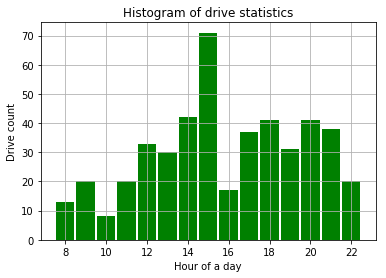

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

data = []
for h, cnt in adjusted_time_periods:
    data.extend([h]*cnt)
plt.hist(data, max(data)-min(data), facecolor='g', align='left', histtype='bar', rwidth=0.9)
plt.xlabel('Hour of a day')
plt.ylabel('Drive count')
plt.title('Histogram of drive statistics')
plt.grid(True)
plt.show()

-----------

<span style="float: left">Prev: <a href="./index.html">乘车指南 🚇</a></span>
<span style="float: right">Next: <a href="./jike_api.html">即刻Web API</a></span>